In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

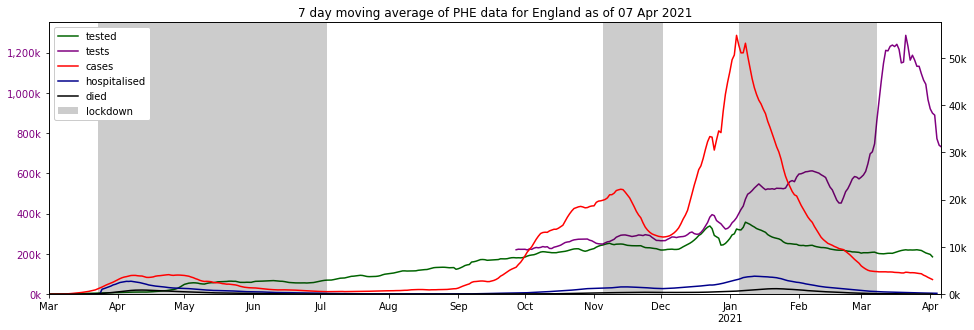

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

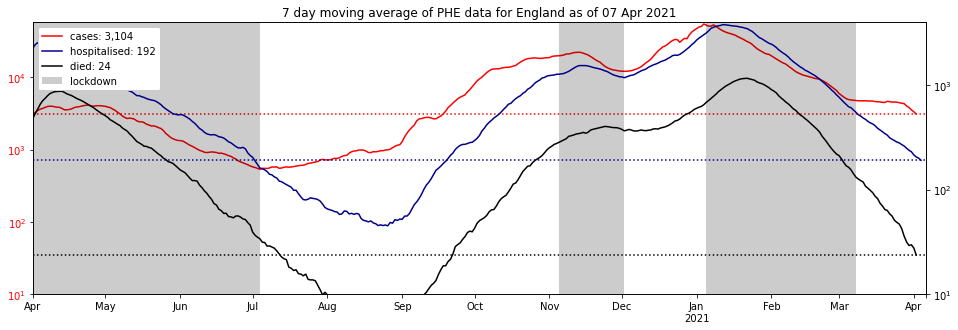

In [3]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

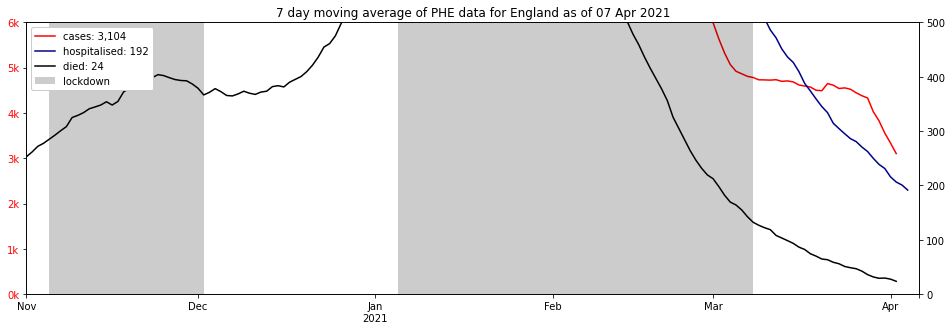

In [4]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=6_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=500)

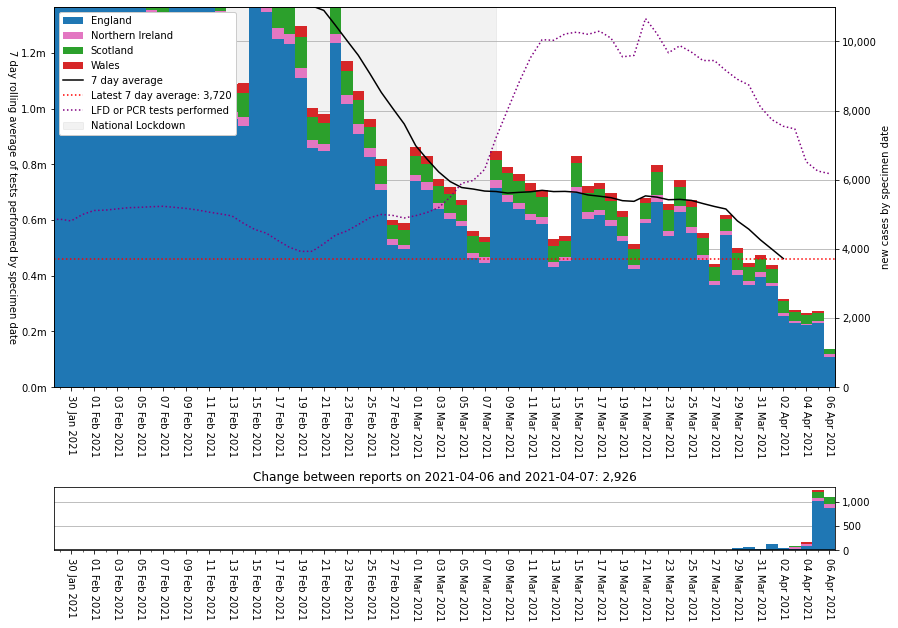

In [5]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,4560777.0,26820161.0,22259384.0,56286961,8.102724,39.546253,52.351023
1,Northern Ireland,N92000002,167923.0,790860.0,622937.0,1893667,8.867610,32.895805,58.236585
2,Scotland,S92000003,479239.0,2593932.0,2114693.0,5463300,8.771969,38.707247,52.520784
3,Wales,W92000004,475570.0,1502641.0,1027071.0,3152879,15.083674,32.575655,52.340670


'partial: 31,707,594 (47.5%), full: 5,683,509'

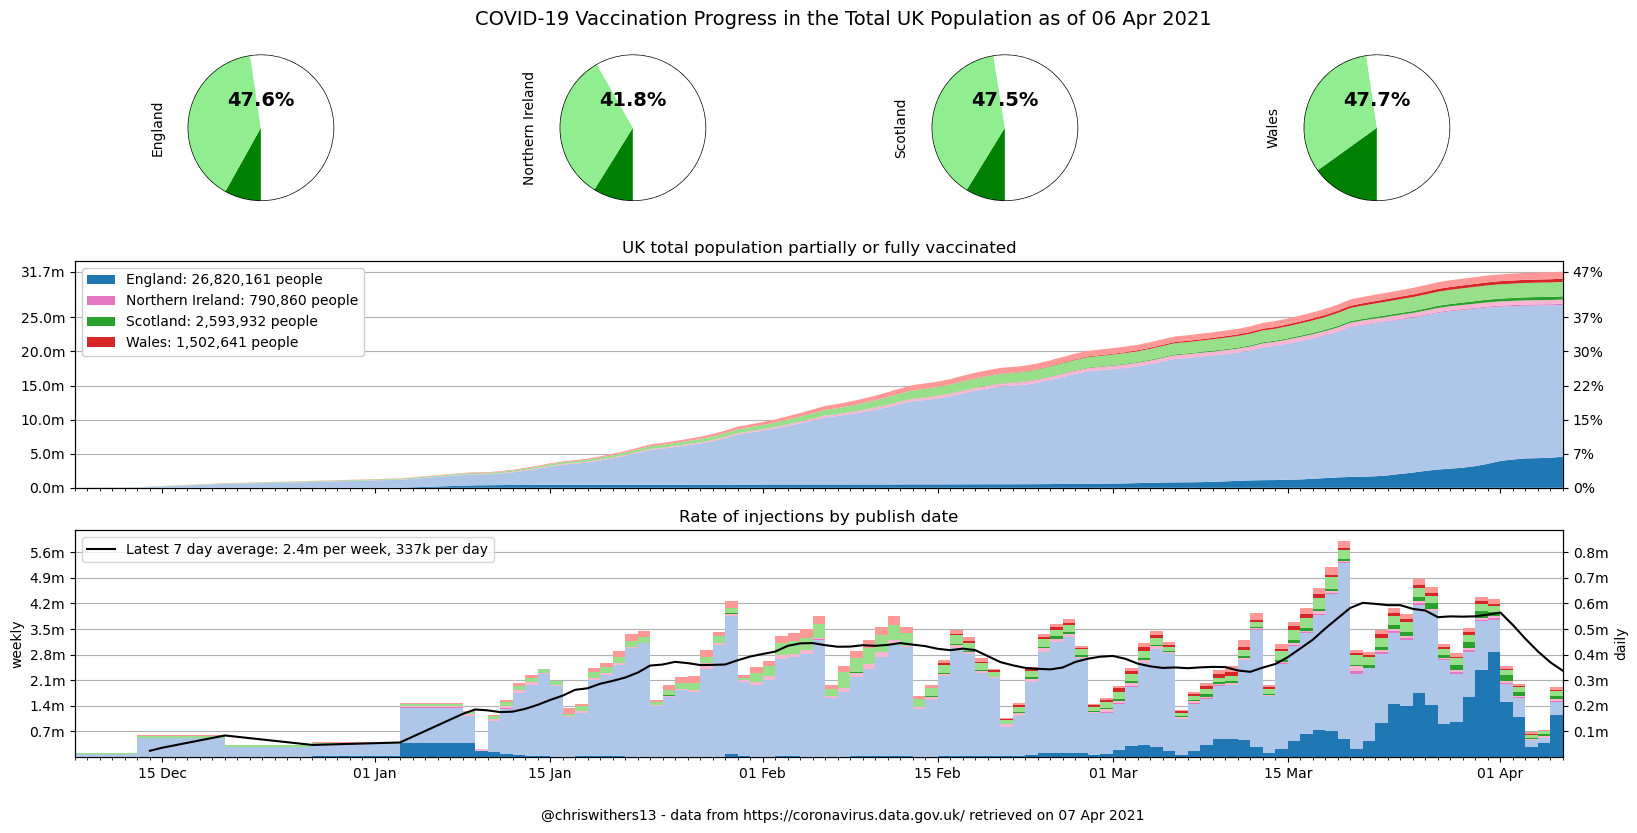

In [6]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [7]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,06 Apr 21,"+54,296","+162,466","+162,466","+26,820,161","+4,560,777","+4,560,777"
Northern Ireland,06 Apr 21,"+5,366","+2,549","+2,549","+790,860","+167,923","+167,923"
Scotland,06 Apr 21,"+16,116","+15,459","+15,459","+2,593,932","+479,239","+479,239"
Wales,06 Apr 21,"+9,449","+6,319","+6,319","+1,502,641","+475,570","+475,570"


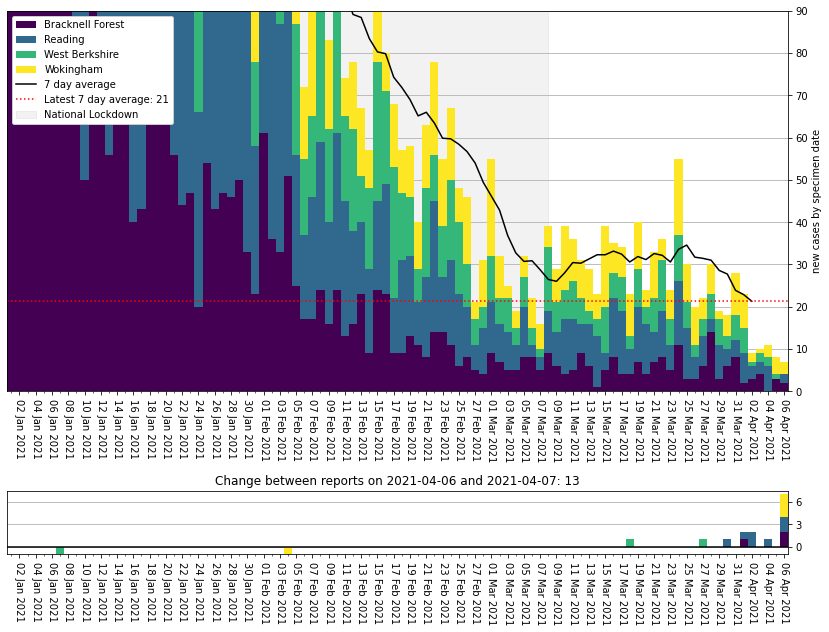

In [8]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=90)

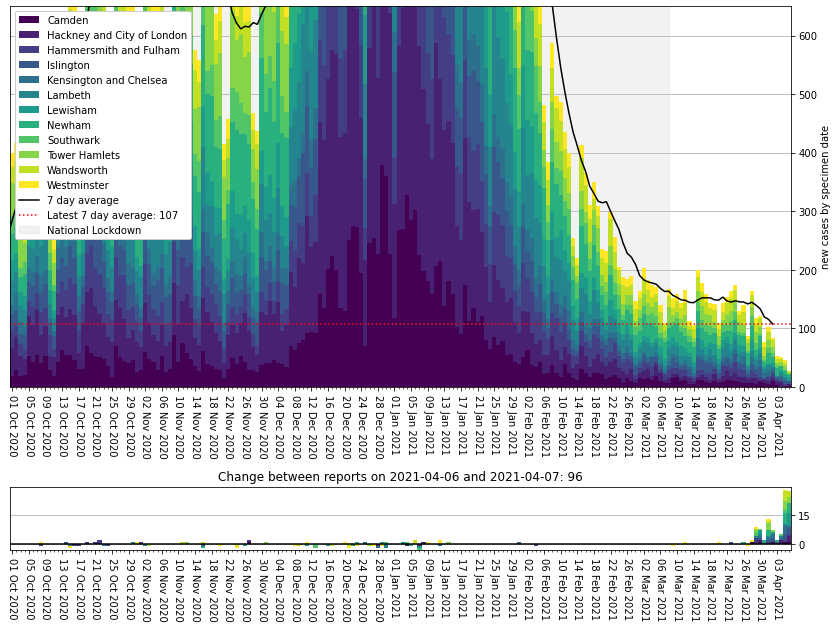

In [9]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000005,Clackmannanshire,145.518044,75.0,2021-04-06
E07000150,Corby,117.699189,85.0,2021-04-06
E07000174,Mansfield,106.117296,116.0,2021-04-06
E08000016,Barnsley,84.661314,209.0,2021-04-06
S12000040,West Lothian,81.376297,149.0,2021-04-06
E08000036,Wakefield,76.942511,268.0,2021-04-06
E06000032,Luton,74.160299,158.0,2021-04-06
E08000017,Doncaster,72.461445,226.0,2021-04-06
E06000016,Leicester,70.294503,249.0,2021-04-06


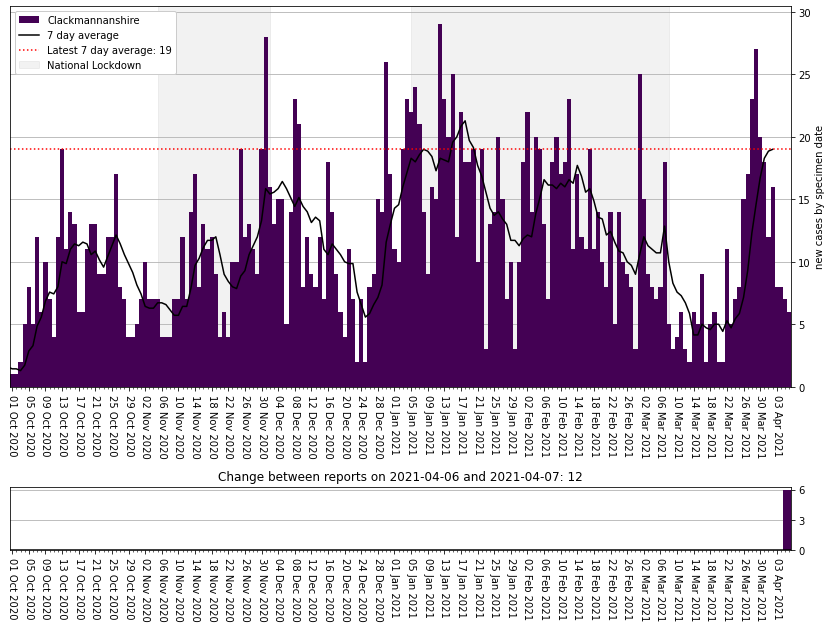

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,64.049303,508.0,2021-04-06
S12000049,Glasgow City,62.863280,398.0,2021-04-06
E08000019,Sheffield,64.802609,379.0,2021-04-06
E08000032,Bradford,65.026974,351.0,2021-04-06
E08000025,Birmingham,28.551010,326.0,2021-04-06
E08000036,Wakefield,76.942511,268.0,2021-04-06
E08000034,Kirklees,59.801677,263.0,2021-04-06
E08000003,Manchester,46.666594,258.0,2021-04-06
E06000016,Leicester,70.294503,249.0,2021-04-06


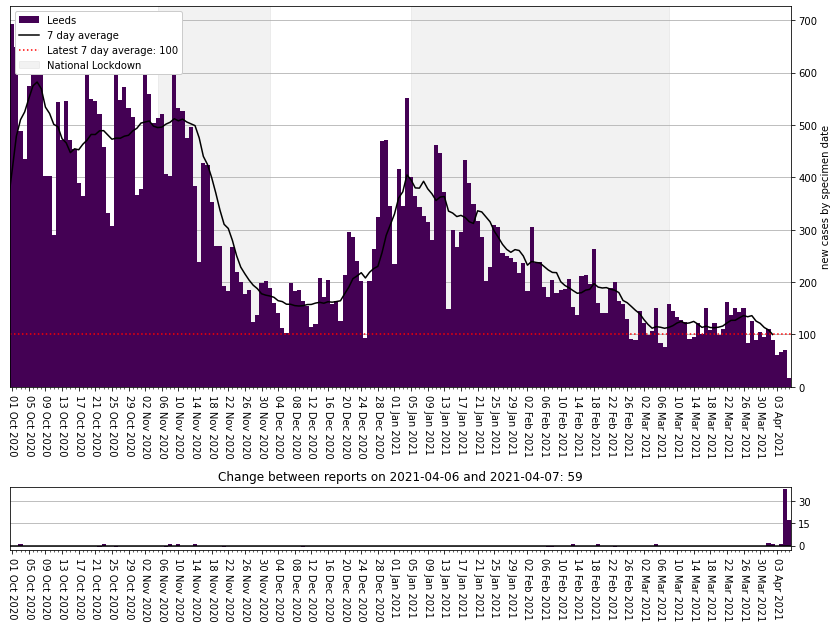

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [15]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.18

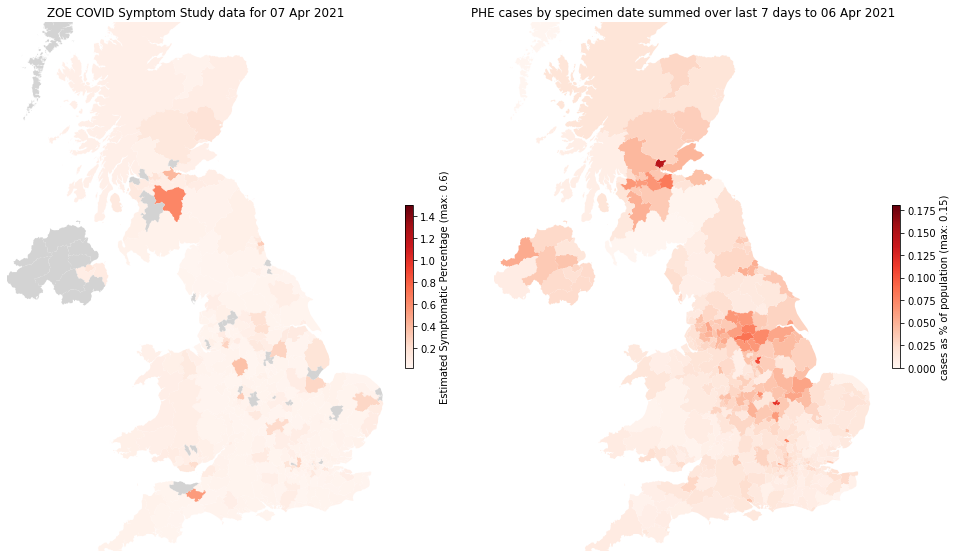

In [16]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [17]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...